# First Order System 
## Step Response

Response for a first order system axposed to a step force (Heaviside function). 
The system starts art rest with the initial value $s_0$ for $t=0$, and goes towards a the final value $s_\infty$ when $t \rightarrow \infty$. 
The time constant for the system is $\tau$
The response as function of time is 

$s(t) = s_\infty - (s_\infty - s_0)e^{-t/\tau}$

In [44]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

%matplotlib ipympl

class StepResponse:
    """Demonstation of first order system step response.

    All calculations and plotting routines are contained in this class
    """
    def __init__(self, s_0=0, s_inf=1, tau=1):
        """Initialise system parameters."""
        self.s_0 = s_0        # Initial value
        self.s_inf = s_inf    # Final value
        self.tau = tau        # Time constant
        self.t_min = -2       # Minimum time on plot
        self.t_max = 20       # Maximum time on plot
        self.n_t = 300        # Number of points in time vectors
        self.ax = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 5],
                         constrained_layout=True,
                         num="First Order System - Step Response")
        ax = fig.add_subplot(1, 1, 1)

        ax.set(xlim=(self.t_min, self.t_max),
               xlabel="Time [s]",
               ylabel="Response s(t)")

        return ax

    def t(self):
        """Create time vector."""
        return np.linspace(self.t_min, self.t_max, self.n_t)

    def _calc_response(self, t):
        """Calculate step response."""
        if self.tau == 0:
            # Exception if time constant equals zero
            s = self.s_inf * np.ones_like(t)
        else:
            s = self.s_inf - (self.s_inf - self.s_0) * np.exp(-t/self.tau)

        k_neg = np.argwhere(t<0)
        s[k_neg] = self.s_0 * np.ones_like(k_neg)   # Set initial value for t<0

        return s

    def s(self):
        """Find step response for all time-points."""
        s = self._calc_response(self.t())
        return s

    def plot(self):
        """Plot result in graph."""
        for art in list(self.ax.lines):
            art.remove()

        # Response at integer no. of time constants
        t_tau = self.tau * np.arange(1, 10)
        s_tau = self._calc_response(t_tau)
        
        self.ax.plot(self.t(), self.s(), "-", color="C0")
        self.ax.plot(t_tau, s_tau, "o", color="C0")
        self.ax.axhline(y=self.s_0, color="black", linestyle='-')
        self.ax.axhline(y=self.s_inf, color="black", linestyle='-')
        self.ax.grid(True)

        ds = abs(self.s_inf - self.s_0)
        s_min = min(self.s_inf, self.s_0) - 0.1*ds
        s_max = max(self.s_inf, self.s_0) + 0.1*ds
        self.ax.set_ylim(s_min, s_max)

        return 0

Label(value='First Order System Step Response', style=LabelStyle(font_weight='bold'))

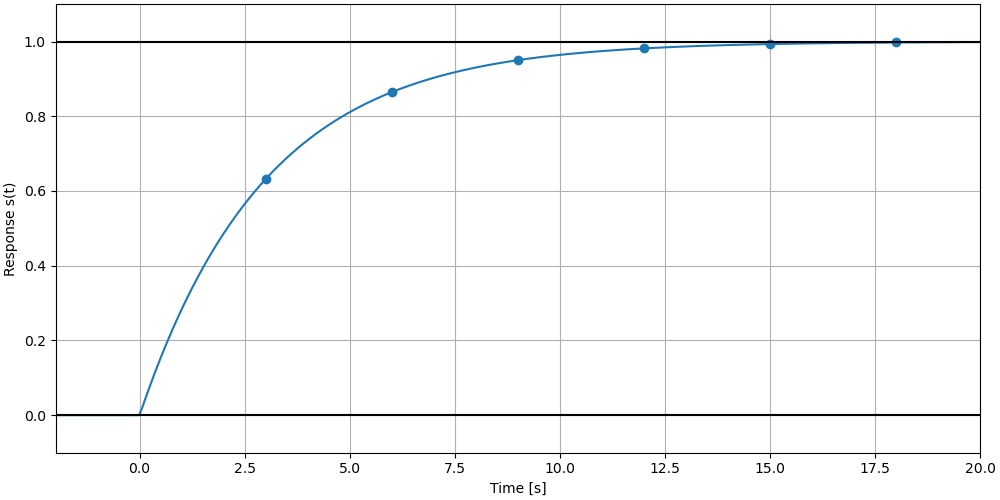

In [46]:
# Load modules for intereactive operation
import ipywidgets as widgets

#  Function that runs the demo interactively
def run_stepresponse(s_0, s_inf, tau):
    """Set values and call plotting function."""
    step_resp.s_0 = s_0
    step_resp.s_inf = s_inf
    step_resp.tau = tau
    step_resp.plot()
    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("First Order System Step Response", 
                             style=dict(font_weight='bold'))

s_0_widget = widgets.FloatText(min=-10, max= 10, value=0, step=0.5, 
                                 description='Initial value ',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='60%'), 
                                 style=widget_style)

s_inf_widget = widgets.FloatText(min=-10, max= 10, value=1, step=0.5, 
                                 description='Final value ',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='60%'), 
                                 style=widget_style)

tau_widget = widgets.FloatSlider(min=00, max= 10, value=3, step=0.1, 
                                 description='Time constant [s]',  
                                 readout_format='.1f',
                                 layout=widgets.Layout(width='40%'),
                                 style=widget_style)

widget_line = widgets.VBox([s_0_widget, s_inf_widget])
widget_box = widgets.HBox([widget_line, tau_widget])

display(title_widget)
display(widget_box)

# Define signal and run demo
step_resp = StepResponse()
w = widgets.interactive(run_stepresponse, s_0=s_0_widget, s_inf=s_inf_widget, tau=tau_widget)

## Frequency Response
The cut-off frequency $f_c$ is given from the time constant $\tau$ as

$\omega_c = \frac{1}{\tau}$

$f_c = \frac{\omega_c}{2\pi} = \frac{1}{2\pi \tau}$

The frequency response $H(f)$ for the system is 

$H(f) = \frac{1}{1 + j\omega\tau} = \frac{1}{1 + j\frac{f}{f_c}}$




In [63]:
class FrequencyResponse():
    """Demonstation of first order system frequency response.

    All calculations and plotting routines are contained in this class
    """
    def __init__(self, tau=1):
        """Initialise system parameters."""
        self.tau = tau        # Time constant
        self.n_f = 300        # Number of points in frequency vectors
        self.flim = [-1, 3]   # Frequency limits, logarithmic
        self.ax_magnitude, self.ax_phase = self.initialise_graphs()

    def initialise_graphs(self):
        """Initialise result graph ."""
        plt.close("all")
        plt.rc('font', size=10)          # Default text sizes
        fig = plt.figure(figsize=[10, 7],
                         constrained_layout=True,
                         num="First Order System - Step Response")
        ax_magnitude = fig.add_subplot(2, 1, 1)
        ax_phase = fig.add_subplot(2, 1, 2)
        
        for ax in [ax_magnitude, ax_phase]:    # Common for both plots
            ax.set(xlabel="Frequency [Hz]",
                   xlim=(1e-1, 1e3) )
            ax.grid(True, which='major', axis='both')
            ax.grid(True, which='minor', axis='x')

        db_min = -24
        ax_magnitude.set(ylabel="Magnitude" ,
                         ylim=(db_min, 2),
                         yticks=np.arange(db_min, 2, 3))

        phi_min = -90
        ax_phase.set(ylabel="Phase [Degrees]",
                     ylim=(phi_min, 0),
                     yticks=np.arange(phi_min, 1, 15))
        
        return ax_magnitude, ax_phase

    def f(self):
        """Create frequency vector."""
        return np.logspace(min(self.flim), max(self.flim), self.n_f)

    def fc(self):
        """Calculate cut-off frequency."""
        return 1/(2*pi*self.tau)

    def H(self):
        """Calculate frequency response."""
        return 1/(1 + 1j*self.f()/self.fc())

    def plot(self):
        """Plot result in graph."""
        for ax in [self.ax_magnitude, self.ax_phase]:
            for art in list(ax.lines):
                art.remove()
            for art in list(ax.texts):
                art.remove()

        indicator_color = "C3"
        h_db = 20*np.log10(abs(self.H()))                
        self.ax_magnitude.semilogx(self.f(), h_db, "-", color="C0")
        self.ax_magnitude.axvline(x=self.fc(), color=indicator_color, linestyle='-')
        self.ax_magnitude.axhline(y=0, color="black", linestyle='-')
        self.ax_magnitude.axhline(y=-3, color=indicator_color, linestyle='-')
        self.ax_magnitude.text( self.fc(), -20, f" $ f_c$={self.fc():.2g} Hz", color=indicator_color)

        self.ax_phase.semilogx(self.f(), np.degrees(np.angle(self.H())), "-", color="C0")
        self.ax_phase.axvline(x=self.fc(), color=indicator_color, linestyle='-')
        self.ax_phase.axhline(y=-45, color=indicator_color, linestyle='-')
        
        return


Label(value='First Order System Frequency Response', style=LabelStyle(font_weight='bold'))

FloatLogSlider(value=1.0, description='Time constant [s]', layout=Layout(width='40%'), max=1.0, min=-4.0, step…

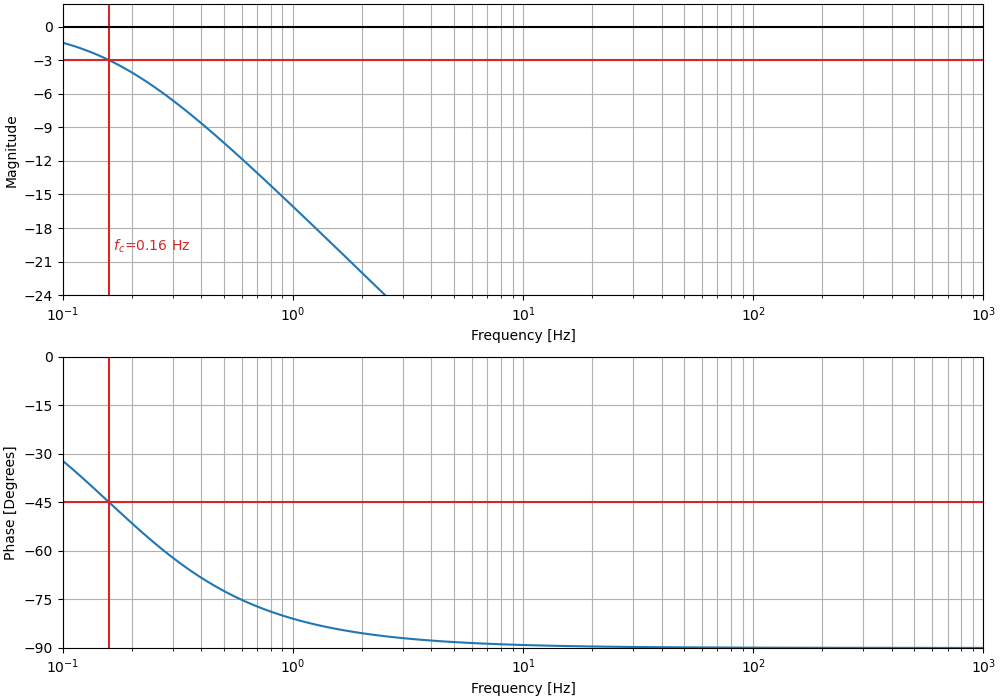

In [64]:
# Load modules for intereactive operation

#  Function that runs the demo interactively
def run_frequencyresponse(tau):
    """Set values and call plotting function."""
    freq_resp.tau = tau
    freq_resp.plot()    
    return

# Define widgets to operate program
widget_style = dict(description_width='initial')

title_widget = widgets.Label("First Order System Frequency Response", 
                             style=dict(font_weight='bold'))

tau_widget = widgets.FloatLogSlider(min=-4, max=1, value=1, step=0.01, 
                                 description='Time constant [s]',  
                                 readout_format='.3g',
                                 layout=widgets.Layout(width='40%'),
                                 style=widget_style)

display(title_widget)
display(tau_widget)

# Define signal and run demo
freq_resp = FrequencyResponse()
run_frequencyresponse(2)
w = widgets.interactive(run_frequencyresponse, tau=tau_widget)